# Bi-Variate Regression - Effect on REM:nREM Outcome
The purpose of this notebook is to look exclusively at how different variables are related to the ratio of REM to nREM. 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import statsmodels.api as sm

## Data Import

In [2]:
df_py3 = pd.read_csv('/Users/hagenfritz/Projects/utx000/studies/cohort1/processed_data/study_adafruit_sleepstats',parse_dates=True,index_col=0)
df_py3['inc%'] = (df_py3['max'] - df_py3['min'])/df_py3['min']

In [3]:
df_py3['var'].unique()

array(['eCO2', 'Lux', 'Visible', 'Infrared', 'NO2', 'T_NO2', 'RH_NO2',
       'CO', 'T_CO', 'RH_CO', 'TVOC'], dtype=object)

In [5]:
df_py2 = pd.read_csv('/Users/hagenfritz/Projects/utx000/studies/cohort1/processed_data/study_sensirion_sleepstats',parse_dates=True,index_col=0)
df_py2['inc%'] = (df_py2['max'] - df_py2['min'])/df_py2['min']

In [6]:
df_py2['var'].unique()

array(['Temperature [C]', 'Relative Humidity', 'CO2', 'PM_N_0p5',
       'PM_N_1', 'PM_N_2p5', 'PM_N_4', 'PM_N_10', 'PM_C_1', 'PM_C_2p5',
       'PM_C_4', 'PM_C_10'], dtype=object)

In [7]:
df_ss = pd.read_csv('/Users/hagenfritz/Projects/utx000/studies/cohort1/processed_data/study_sleepStagesDay.csv',parse_dates=True,index_col=0)

In [9]:
df_ss.head()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,Efficiency,Awake%,Light%,Deep%,REM%,Non-REM%,REM/nREM,TotalHoursAsleep,ID
SleepDay,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,9l7wmsc3
2020-01-23,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,9l7wmsc3
2020-01-24,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,9l7wmsc3
2020-01-25,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,9l7wmsc3
2020-01-26,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,9l7wmsc3


## One Variable Regression

In [8]:
def plotLinearRegression(X,xlim,Y,ylim,show_plot=True):
    '''
    Inputs:
        - X: list of values corresponding to the independent variable
        - xlim: list of two values specifying the lower and upper bounds of the horizontal axis
        - Y: list of values corresponding to the dependent variable
        - ylim: list of two values specifying the lower and upper bounds of the vertical axis
    Plots a linear regression of the two variables and returns the ax handle if successful, otherwise False
    '''
    
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1)
    
    try:
        if len(X) > 1:
            t = np.arange(len(X))
            X = sm.add_constant(X)
            model = sm.OLS(Y, X).fit()
            predictions = model.predict(X) # make the predictions by the model

            # Plotting
            if show_plot:
                ## Scatter
                fig,ax = plt.subplots(figsize=(10,10))
                ax.scatter(X[:,1],Y,c=t,s=100,cmap='Blues',edgecolor='black')

                ## Line of Best Fit
                ax.plot(X[:,1],predictions,color='red')

                top = 0
                bot = 0
                for i in range(len(predictions)):
                    top += (predictions[i]-np.mean(Y))**2
                    bot += (Y[i] - np.mean(Y))**2
                rsqrd = top/bot

                ## Formatting Remainder of Axis
                ax.set_xlim(xlim)
                ax.set_ylim(ylim)
                ### Print out the statistics
                loc_x = min(xlim)+0.01*(max(xlim)-min(xlim))
                loc_y = min(ylim)+0.01*(max(ylim)-min(ylim))
                ax.text(loc_x,loc_y+0.1*(max(ylim)-min(ylim)),'Intercept: ' + str(round(model.params[0],4)))
                ax.text(loc_x,loc_y+0.05*(max(ylim)-min(ylim)),'Slope: ' + str(round(model.params[1],4)))
                ax.text(loc_x,loc_y,'r$^2$: ' + str(round(rsqrd,4)))
                
                return ax, model
            else:
                return False, model
    except Exception as inst:
        print(inst)

        return False, False

# Python 3

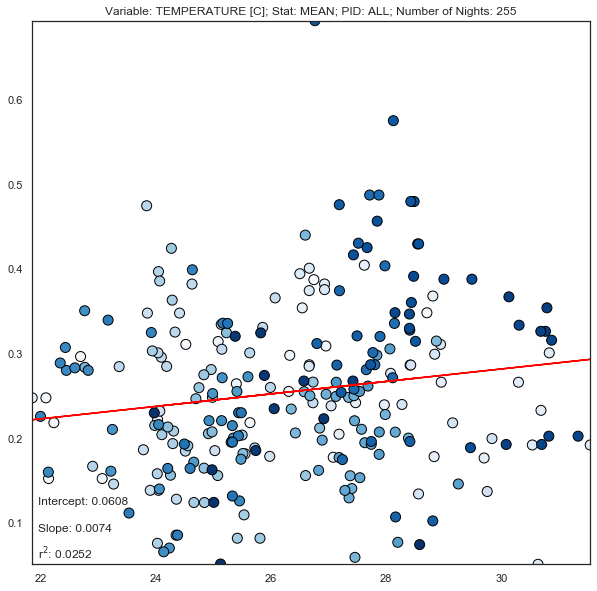

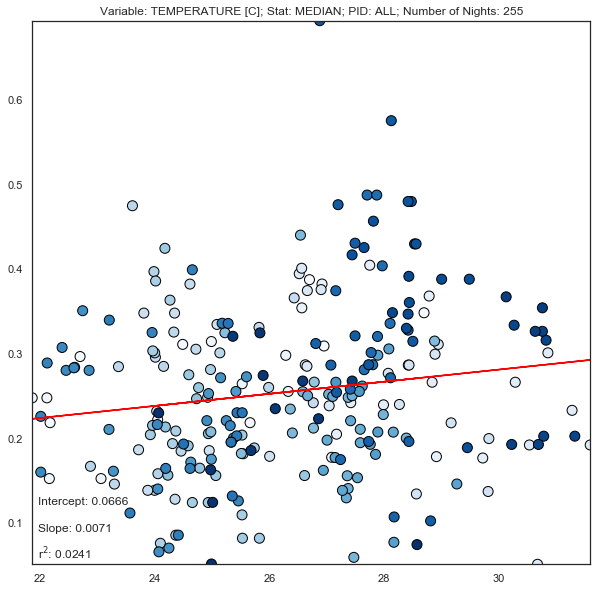

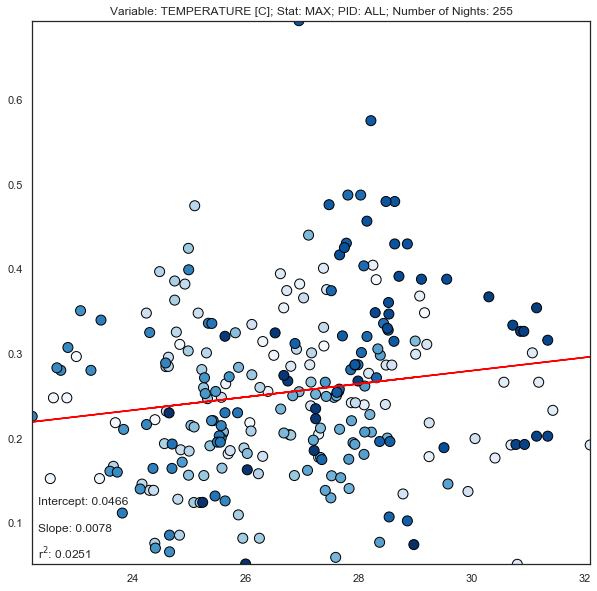

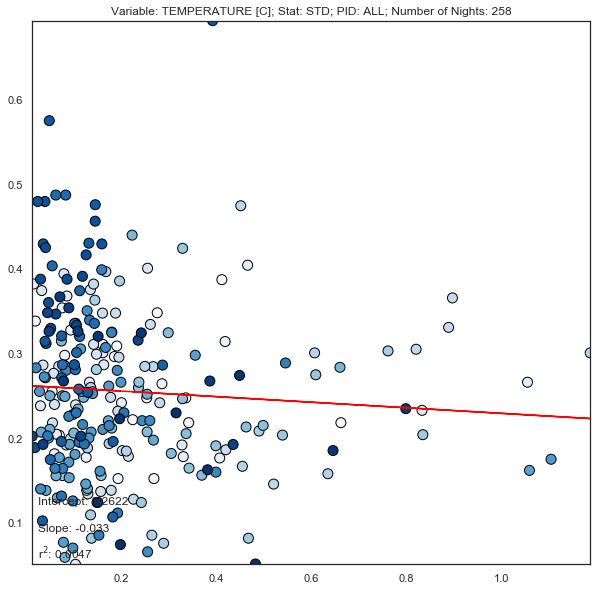

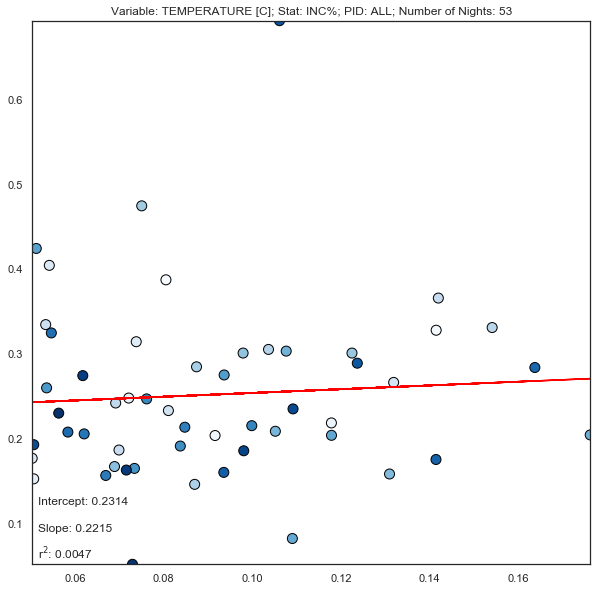

In [34]:
results_df = pd.DataFrame()
  
df = df_py3
#var = 'TVOC'
#low_cutoffs = [0,0,0]
#high_cutoffs = [1000000,150,100]

#var = 'Lux'
#low_cutoffs = [50,200,10]
#high_cutoffs = [1000,1000,1000]

#var = 'T_NO2'
#low_cutoffs = [15,0,0]
#high_cutoffs = [4000,100000,100000]

#var = 'RH_NO2'
#low_cutoffs = [0,0,0]
#high_cutoffs = [4000,1000,1000]

#var = 'Visible'
#low_cutoffs = [100000,0,100000]
#high_cutoffs = [1000000,1000000,1000000]

df = df_py2
var = 'Temperature [C]'
low_cutoffs = [15,0,0.05]
high_cutoffs = [1000000,150,0.25]

#var = 'Relative Humidity'
#low_cutoffs = [0,0,0]
#high_cutoffs = [1000000,150,1000]

#var = 'CO2'
#low_cutoffs = [1000,0,0]
#high_cutoffs = [1000000,150,2]

#var = 'PM_C_2p5'
#low_cutoffs = [6,0,0]
#high_cutoffs = [1000000,150,200]

#var = 'PM_C_10'
#low_cutoffs = [6,0,0]
#high_cutoffs = [1000000,150,200]

# Masking by variables - still has all participants
df_byvar = df[df['var'] == var]

# Looping through all the statistics - skipping over the ID and var columns
for column in df_byvar.columns:
    if column in ['ID','var','min']:
        continue

    # Looping through all the participants
    overall = pd.DataFrame()
    for pid in df_byvar['ID'].unique():
        dep_vars_ind = df_byvar[df_byvar['ID'] == pid]
        indep_vars_ind = df_ss[df_ss['ID'] == pid]
        combined = pd.concat([dep_vars_ind,indep_vars_ind],join='inner',axis=1)

        # Removing data where the efficiency is less than zero
        combined = combined[combined['REM/nREM'] > 0]
        
        # Removing outliers from summary stats
        if column in ['max','mean','median']:
            combined = combined[combined[column] > low_cutoffs[0]]
            combined = combined[combined[column] < high_cutoffs[0]]
        if column == 'std':
            combined = combined[combined[column] > low_cutoffs[1]]
            combined = combined[combined[column] < high_cutoffs[1]]
        if column == 'inc%':
            combined = combined[combined[column] > low_cutoffs[2]]
            combined = combined[combined[column] < high_cutoffs[2]]

        if len(combined) > 0:
            overall = pd.concat([overall,combined])

    X = overall[column].values
    y = overall['REM/nREM'].values

    ax, model = plotLinearRegression(X,[min(X),max(X)],y,[min(y),max(y)],True)
    try:
        ax.set_title(f'Variable: {var.upper()}; Stat: {column.upper()}; PID: ALL; Number of Nights: {len(overall)}')
        plt.show()
        plt.close()
    except:
        pass

    onevar_df = pd.DataFrame(data={'Variable':[var],'Stat':[column.upper()],'Outcome':['REM/nREM'.upper()],
                                  'x0':[model.params[0]],'x1':[model.params[1]],'No. Points':[len(overall)],'Fit':[model.rsquared]})

    results_df = pd.concat([results_df,onevar_df])

In [35]:
results_df

,Variable,Stat,Outcome,x0,x1,No. Points,Fit
0,Temperature [C],MEAN,REM/NREM,0.060820,0.007360,255,0.025234
0,Temperature [C],MEDIAN,REM/NREM,0.066635,0.007141,255,0.024114
0,Temperature [C],MAX,REM/NREM,0.046599,0.007769,255,0.025114
0,Temperature [C],STD,REM/NREM,0.262175,-0.033002,258,0.004664
0,Temperature [C],INC%,REM/NREM,0.231415,0.221484,53,0.004680
